In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

import weightedcalcs as wc


In [40]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

In [36]:
hh = pd.read_csv("household_data_pre.csv")

In [37]:
hh

,income,weights,homeshare,home_choice,consumption
0,0.390389,0.009584,0.998816,0.998816,0.304541
1,0.388221,0.007384,0.996913,0.996984,0.398361
2,0.386053,0.004162,0.994619,0.995239,0.444576
3,0.383886,0.001733,0.993378,0.994224,0.484351
4,0.381718,0.001195,0.991679,0.992914,0.514616
...,...,...,...,...,...
995,3.197489,0.000383,0.814991,0.835032,3.196209
996,3.195321,0.000501,0.814267,0.831131,3.289422
997,3.193153,0.000168,0.812955,0.826802,3.382503
998,3.190985,0.000178,0.811137,0.822134,3.475520


In [38]:
calc = wc.Calculator("weights")

In [39]:
income_type = "asset"

foo = hh[((hh[income_type] <= calc.quantile(hh, income_type, 0.25)) )];

print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))

print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hh,"homeshare"), 4))

foo = hh[((hh[income_type] > calc.quantile(hh, income_type, 0.75)) )]

print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))

KeyError: 'asset'

## Fix prices, let the trade cost adjust...

In [64]:
hhpost = pd.read_csv("household-data-aut-fix-p.csv")
welfare = pd.read_csv("welfare-US-aut-fixp.csv")

hhpost = pd.merge(hhpost, welfare[["welfare", "asset", "shock"]], left_index = True, right_index = True)

In [65]:
hhpost

,income,weights,homeshare,home_choice,consumption,welfare,asset,shock
0,0.390389,0.009585,0.998816,0.998816,0.304541,0.000873,-2.00000,1.0
1,0.388221,0.007385,0.996913,0.996984,0.398360,0.000882,-1.89899,1.0
2,0.386053,0.004163,0.994618,0.995238,0.444576,0.000891,-1.79798,1.0
3,0.383886,0.001733,0.993376,0.994222,0.484350,0.000899,-1.69697,1.0
4,0.381718,0.001195,0.991675,0.992912,0.514615,0.000907,-1.59596,1.0
...,...,...,...,...,...,...,...,...
995,3.197489,0.000379,0.813366,0.833619,3.197174,0.012072,7.59596,10.0
996,3.195321,0.000503,0.812625,0.829676,3.290298,0.012125,7.69697,10.0
997,3.193153,0.000166,0.811286,0.825299,3.383305,0.012185,7.79798,10.0
998,3.190985,0.000178,0.809435,0.820583,3.476259,0.012246,7.89899,10.0


In [66]:
income_type = "asset"

foo = hhpost[((hhpost[income_type] <= calc.quantile(hhpost, income_type, 0.25)) )];

######## Guys at bottom
print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Bottom Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Median
print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hhpost,"homeshare"), 4))
print(" ")
print("Median Welfare")
print(round(calc.median(hhpost,"welfare"),4))

foo = hhpost[((hhpost[income_type] >= calc.quantile(hhpost, income_type, 0.75)) )];

######## Top
print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Top Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Aggregate 
print(" ")
print("Aggregate Welfare")
print(round(calc.mean(hhpost,"welfare"),4))

foo = hhpost[(hhpost.welfare <= 0.0 )];

print(" ")
print("Share who Loose")
print(round(foo.weights.sum(),4))
print(round(calc.mean(foo,"asset"),4))

Bottom Quartile Trade Share
0.0168
 
Bottom Welfare
0.0013
 
Median Trade Share
0.0511
 
Median Welfare
0.0023
 
Top Quartile Trade Share
0.1027
 
Top Welfare
0.0052
 
Aggregate Welfare
0.0031
 
Share who Loose
0.0
nan


C:\Users\irmew01\Anaconda3\lib\site-packages\weightedcalcs\core.py:64: RuntimeWarning: invalid value encountered in double_scalars
  return (values * weights).sum() / total_weight


This is what should be expected. It's cheaper to buy stuff...so everybody wins. Some win more than others --- poor guys care less about autralia than rich guys, but everyone would agree that this is good. Also notice that the winners are only 5x larger than small winners.

---

### Let prices adjust

So now R, w will change. 

Side note: Recall that w and R have to move to (i) make sure supply of goods equalls world demand and this is modulated by the price at which goods are supplied at and (ii) that asset demand within a country equalls asset supply (and this would be modulated by R). These things do have to work in concert...but this is the demarcation.

In [62]:
hhpost = pd.read_csv("household-data-aut.csv")

welfare = pd.read_csv("welfare-US-aut.csv")

hhpost = pd.merge(hhpost, welfare[["welfare", "asset", "shock"]], left_index = True, right_index = True)

In [63]:
income_type = "asset"

foo = hhpost[((hhpost[income_type] <= calc.quantile(hhpost, income_type, 0.25)) )];

######## Guys at bottom
print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Bottom Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Median
print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hhpost,"homeshare"), 4))
print(" ")
print("Median Welfare")
print(round(calc.median(hhpost,"welfare"),4))

foo = hhpost[((hhpost[income_type] >= calc.quantile(hhpost, income_type, 0.75)) )];

######## Top
print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Top Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Aggregate 
print(" ")
print("Aggregate Welfare")
print(round(calc.mean(hhpost,"welfare"),4))

foo = hhpost[(hhpost.welfare <= 0.0 )];

print(" ")
print("Share who Loose")
print(round(foo.weights.sum(),4))
print(round(calc.mean(foo,"asset"),4))

Bottom Quartile Trade Share
0.0167
 
Bottom Welfare
-0.1628
 
Median Trade Share
0.0509
 
Median Welfare
-0.0782
 
Top Quartile Trade Share
0.1025
 
Top Welfare
0.084
 
Aggregate Welfare
-0.0558
 
Share who Loose
0.7263
-1.157


Now prices have adjusted. The changes in W and R (and then behavior in response), guys at the bottom of the asset distribution loose, guys at the top win. And this is all amplified noticing that the GE gains are 16X for rich guys. And most don't like this shock. 

C:\Users\irmew01\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


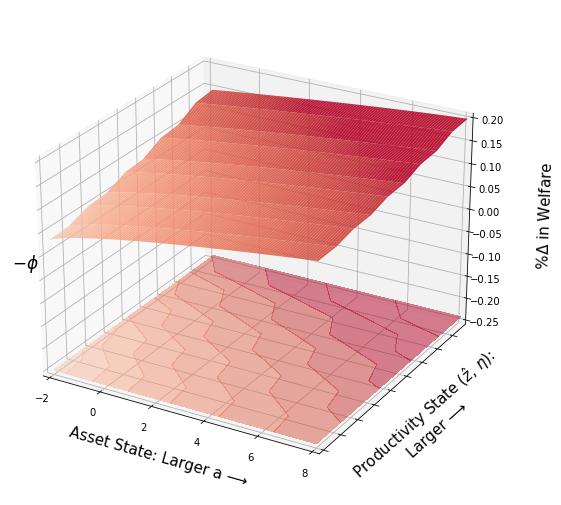

In [61]:
welfare = pd.read_csv("welfare-US-can.csv")

x, y, z = create_grid(welfare,"asset","shock","welfare")

fig = plt.figure(figsize = [15.0,9.0], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=-0.16, vmax=0.16),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.25

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=-0.16, vmax=0.16), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.05)
#ax.set_xticklabels([0.0])

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(-.25, 0.20)
#ax.set_zticklabels(["   -0.01", "    0.00", "    0.01", "    0.02", "    0.03", "    0.04"], fontsize = 14)

ax.text(-2.75, 0.05, -0.01, "$-\phi$", fontsize = 17)

#ax.text(-2.95, 0.05, 0.024, "ACR -> \nRep Agent = 0.025", fontsize = 13)

# ax.text(-3.5, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n \n \n \n %$\Delta$ in Welfare", fontsize = 15)

#plt.savefig("../notes/figures/welfare-elasticity.pdf", bbox_inches = "tight")

plt.show()